# import libraries

In [134]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# check library versions
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
# print('matplotlib version:', plt.__version__)

numpy version: 1.21.5
pandas version: 1.4.2


# load csv file of the accidents dataset and check dataframe

create dataframe and check if it works

In [135]:
csv_path_accidents = "../data/01-01-2012_31-12-2021/Ongevallengegevens/ongevallen.csv" # 2012 to 2021
# csv_path_accidents = "C:/Users/shobe/Documents/school/minor AI/personal_project/01-01-2012_31-12-2021/01-01-2012_31-12-2021/Ongevallengegevens/ongevallen.csv" # desktop
df_accidents = pd.read_csv(csv_path_accidents, sep=',')
df_accidents.columns =["VKL_NUMMER","REGNUMMER","PVOPGEM","DATUM_VKL","DAG_CODE","MND_NUMMER","JAAR_VKL","TIJDSTIP","UUR","DDL_ID","AP3_CODE","AP4_CODE","AP5_CODE","ANTL_SLA","ANTL_DOD","ANTL_GZH","ANTL_SEH","ANTL_GOV","ANTL_PTJ","ANTL_TDT","MNE_CODE","AOL_ID","NIVEAUKOP","WSE_ID","WSE_AN","BEBKOM","MAXSNELHD","WVL_ID","WVG_ID","WVG_AN","WDK_ID","WDK_AN","LGD_ID","ZAD_ID","WGD_CODE_1","WGD_CODE_2","BZD_ID_VM1","BZD_ID_VM2","BZD_ID_VM3","BZD_VM_AN","BZD_ID_IF1","BZD_ID_IF2","BZD_ID_IF3","BZD_IF_AN","BZD_ID_TA1","BZD_ID_TA2","BZD_ID_TA3","BZD_TA_AN","JTE_ID","WVK_ID","HECTOMETER","FK_VELD5","HUISNUMMER","GME_ID","GME_NAAM","PVE_CODE","PVE_NAAM","KDD_NAAM","PLT_NAAM","DIENSTCODE","DIENSTNAAM","DISTRCODE","DISTRNAAM","DAGTYPE","IND_ALC","WEEKNR"]
df_accidents.head(5)

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_34164\3821003874.py:3: DtypeWarning: Columns (1,2,24,25,29,31,34,35,39,43,47,52,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(csv_path_accidents, sep=',')


,VKL_NUMMER,REGNUMMER,PVOPGEM,DATUM_VKL,DAG_CODE,MND_NUMMER,JAAR_VKL,TIJDSTIP,UUR,DDL_ID,...,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,DAGTYPE,IND_ALC,WEEKNR
0,20140135691,2014121457.0,J,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord,NaN,NaN,NaN
4,20140135695,2014218979.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN


check how many fields are filled in per column

In [136]:
for i, j in df_accidents.iteritems():
    k = j.count()
    print(i, ": ", k)

VKL_NUMMER :  1138956
REGNUMMER :  961419
PVOPGEM :  43716
DATUM_VKL :  0
DAG_CODE :  0
MND_NUMMER :  0
JAAR_VKL :  1138956
TIJDSTIP :  0
UUR :  0
DDL_ID :  0
AP3_CODE :  1138956
AP4_CODE :  0
AP5_CODE :  0
ANTL_SLA :  0
ANTL_DOD :  0
ANTL_GZH :  0
ANTL_SEH :  0
ANTL_GOV :  0
ANTL_PTJ :  1138956
ANTL_TDT :  0
MNE_CODE :  0
AOL_ID :  1138956
NIVEAUKOP :  1138956
WSE_ID :  640003
WSE_AN :  151
BEBKOM :  576826
MAXSNELHD :  758225
WVL_ID :  636695
WVG_ID :  628376
WVG_AN :  4088
WDK_ID :  633319
WDK_AN :  2692
LGD_ID :  729555
ZAD_ID :  8
WGD_CODE_1 :  611356
WGD_CODE_2 :  137
BZD_ID_VM1 :  59336
BZD_ID_VM2 :  1432
BZD_ID_VM3 :  82
BZD_VM_AN :  1062
BZD_ID_IF1 :  33147
BZD_ID_IF2 :  4
BZD_ID_IF3 :  0
BZD_IF_AN :  52843
BZD_ID_TA1 :  9377
BZD_ID_TA2 :  59
BZD_ID_TA3 :  0
BZD_TA_AN :  796
JTE_ID :  272869
WVK_ID :  866087
HECTOMETER :  264931
FK_VELD5 :  1138956
HUISNUMMER :  211577
GME_ID :  1138956
GME_NAAM :  1138956
PVE_CODE :  1138956
PVE_NAAM :  1138956
KDD_NAAM :  947314
PLT_NAAM :  

# drop unnecessary columns

drop columns with less than n amount of non empty in cells

In [137]:
threshold = 100000
df_2 = df_accidents
bad_rows = []
for i, c in df_accidents.iteritems():
    k = c.count()
    if k <= threshold:
        bad_rows.append(i)
df_2 = df_2.drop(columns=bad_rows)
df_2.head(10)

,VKL_NUMMER,REGNUMMER,JAAR_VKL,AP3_CODE,ANTL_PTJ,AOL_ID,NIVEAUKOP,WSE_ID,BEBKOM,MAXSNELHD,...,GME_ID,GME_NAAM,PVE_CODE,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM
0,20140135691,2014121457.0,2014,UMS,5,9,E,1.0,NaN,30.0,...,1931,Krimpenerwaard,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,2014,UMS,3,9,E,1.0,NaN,120.0,...,1892,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,2014,UMS,2,0,S,1.0,NaN,50.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,2014,UMS,2,0,E,1.0,NaN,100.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord
4,20140135695,2014218979.0,2014,LET,2,0,G,4.0,NaN,30.0,...,534,Hillegom,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
5,20140135696,2014327152.0,2014,LET,2,9,S,1.0,NaN,50.0,...,1892,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
6,20140135698,2014272113.0,2014,UMS,2,0,G,5.0,NaN,50.0,...,513,Gouda,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
7,20140135699,2014334206.0,2014,UMS,1,9,E,NaN,NaN,NaN,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
8,20140135700,2014326638.0,2014,UMS,2,0,G,4.0,NaN,50.0,...,513,Gouda,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
9,20140135701,2014037969.0,2014,UMS,2,0,G,5.0,NaN,50.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN


check remaining columns

In [138]:
for i, j in df_2.iteritems():
    k = j.count()
    print(i, ": ", k)

VKL_NUMMER :  1138956
REGNUMMER :  961419
JAAR_VKL :  1138956
AP3_CODE :  1138956
ANTL_PTJ :  1138956
AOL_ID :  1138956
NIVEAUKOP :  1138956
WSE_ID :  640003
BEBKOM :  576826
MAXSNELHD :  758225
WVL_ID :  636695
WVG_ID :  628376
WDK_ID :  633319
LGD_ID :  729555
WGD_CODE_1 :  611356
JTE_ID :  272869
WVK_ID :  866087
HECTOMETER :  264931
FK_VELD5 :  1138956
HUISNUMMER :  211577
GME_ID :  1138956
GME_NAAM :  1138956
PVE_CODE :  1138956
PVE_NAAM :  1138956
KDD_NAAM :  947314
PLT_NAAM :  1079326
DIENSTCODE :  180078
DIENSTNAAM :  180078
DISTRCODE :  180078
DISTRNAAM :  180078


# plot yearly, nationally and apply linear regression

plot yearly accidents

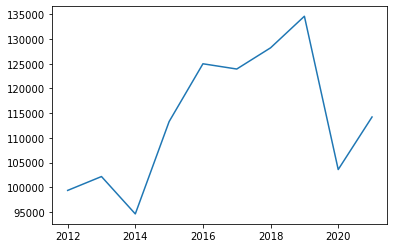

In [139]:
min_year = df_2.min(axis='rows', numeric_only=True)[1].astype(int)
max_year = df_2.max(axis='rows', numeric_only=True)[1].astype(int)
year = range(min_year, max_year + 1)
n_accidents = df_2.groupby("JAAR_VKL")["JAAR_VKL"].count()
fig, ax = plt.subplots()
ax.plot(year, n_accidents.iloc[:])
plt.show()

apply linear regression and plot the result

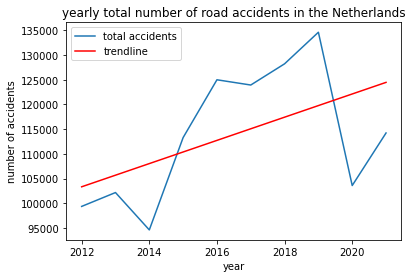

In [140]:
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
linear_regressor = LinearRegression()
linear_regressor.fit(year_2, n_accidents_2)
Y_pred = linear_regressor.predict(year_2)

plt.title("yearly total number of road accidents in the Netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(year, n_accidents, label="total accidents")
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()

# plot yearly, per province and apply linear regression

check the province names and codes

In [141]:
print(df_2["PVE_NAAM"].unique())
print(df_2["PVE_CODE"].unique())

['Zuid-Holland' 'Noord-Brabant' 'Limburg' 'Gelderland' 'Flevoland'
 'Utrecht' 'Noord-Holland' 'Friesland' 'Groningen' 'Drenthe' 'Zeeland'
 'Overijssel']
['ZH' 'NB' 'LB' 'GL' 'FL' 'UT' 'NH' 'FR' 'GR' 'DR' 'ZL' 'OV']


give the provinces their own number

In [142]:
df_4 = df_2
df_4["PVE_NUMR"] = df_4["PVE_CODE"].map( {"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12} ).astype(int)
df_4.head(3)

,VKL_NUMMER,REGNUMMER,JAAR_VKL,AP3_CODE,ANTL_PTJ,AOL_ID,NIVEAUKOP,WSE_ID,BEBKOM,MAXSNELHD,...,GME_NAAM,PVE_CODE,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,PVE_NUMR
0,20140135691,2014121457.0,2014,UMS,5,9,E,1.0,NaN,30.0,...,Krimpenerwaard,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1
1,20140135692,2014273612.0,2014,UMS,3,9,E,1.0,NaN,120.0,...,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1
2,20140135693,2014095971.0,2014,UMS,2,0,S,1.0,NaN,50.0,...,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1


take only the year, the province code and the province number

In [143]:
df_5 = df_4[["JAAR_VKL", "PVE_CODE", "PVE_NUMR"]]
df_5.head(5)

,JAAR_VKL,PVE_CODE,PVE_NUMR
0,2014,ZH,1
1,2014,ZH,1
2,2014,ZH,1
3,2014,ZH,1
4,2014,ZH,1


create a new dataframe which consists of the amount of accidents per province per year and save it to a file because it take over 30 min to run

In [144]:
# years_6 = df_5["JAAR_VKL"].unique()
# provinces_6 = df_5["PVE_CODE"].unique()
# provinces_number_6 = df_5["PVE_NUMR"].unique()

# # create an empty datafrqme for each year-province combination
# df_6 = pd.DataFrame(columns=["YEAR", "PROVINCE", "N_ACCIDENTS"])
# i = 0
# for j in years_6:
#     for k in provinces_6:
#         df_6.loc[i] = [j, k, 0]
#         i+=1

# # fill in the amount of accident for each combi
# for i, j in df_5.iterrows():
#     for k, l in df_6.iterrows():
#         if j[0] == l[0] and j[1] == l[1]:
#             df_6.iloc[k, 2] = df_6.iloc[k, 2] +1
#             break

# # save the dataframe to a csv
# df_6.to_csv("df_6.csv", index=False)

# df_6

load saved dataframe and create the province code again since it is not saved in the file

In [145]:
df_7 = pd.read_csv("df_6.csv", sep=',')
df_7["PVE_CODE"] = df_7["PROVINCE"].map({"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12}).astype(int)
df_7

,YEAR,PROVINCE,N_ACCIDENTS,PVE_CODE
0,2014,ZH,18208,1
1,2014,NB,15082,2
2,2014,LB,6436,3
3,2014,GL,12273,4
4,2014,FL,1595,5
...,...,...,...,...
115,2018,FR,3417,8
116,2018,GR,3566,9
117,2018,DR,2854,10
118,2018,ZL,2432,11


plot the amount of accidents per province per year with a rainbow color gradient

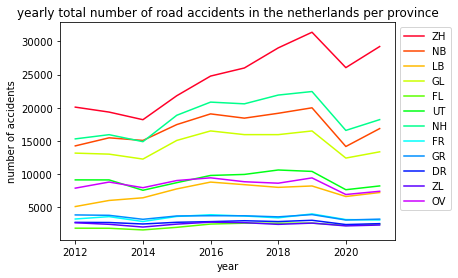

In [146]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]
        line.append(point["N_ACCIDENTS"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total number of road accidents in the netherlands per province")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# plot data for a single province

create a dataframe for onlyone province

In [147]:
target_province = "ZH"
sub_df_7 = df_7[df_7["PROVINCE"]==target_province]
sub_df_7

,YEAR,PROVINCE,N_ACCIDENTS,PVE_CODE
0,2014,ZH,18208,1
12,2020,ZH,26056,1
24,2019,ZH,31389,1
36,2021,ZH,29235,1
48,2013,ZH,19355,1
60,2012,ZH,20101,1
72,2015,ZH,21817,1
84,2016,ZH,24782,1
96,2017,ZH,26004,1
108,2018,ZH,29029,1


plot the amount of accidents per year for a single province

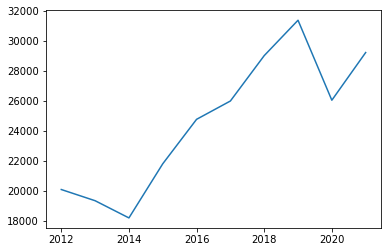

In [148]:
min_year = df_7["YEAR"].min()
max_year = df_7["YEAR"].max()
year = range(min_year, max_year + 1)
n_accidents = []
for i, j in enumerate(year):
    row = sub_df_7.loc[df_7["YEAR"]==j]
    n_accidents.insert(i, row["N_ACCIDENTS"])
fig, ax = plt.subplots()
ax.plot(year, n_accidents)
plt.show()

apply linear regression and plot the results together with the existing data

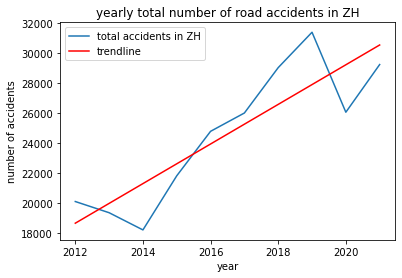

In [149]:
target_province = "ZH"
df_7_2 = df_5.loc[df_5["PVE_CODE"] == target_province]
df_9 = df_7_2["JAAR_VKL"].value_counts()
df_10 = df_9.reset_index()
df_11 = df_10.sort_values("index", ignore_index=True)

year = df_11.iloc[:,0]
n_accidents = df_11.iloc[:,1]
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
linear_regressor = LinearRegression()
linear_regressor.fit(year_2, n_accidents_2)
Y_pred = linear_regressor.predict(year_2)
plt.title("yearly total number of road accidents in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(year, n_accidents, label="total accidents in " + target_province)
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()

# find correlation

# import dataset about population

load the data and add each value in the first row to the column names in brackets and save it to a file <br>
this dataset contains all data in the population dataset which is recorded on january 1st

In [150]:
csv_path_population_residency = "../data/aantal_inwoners_en_voertuigen/Regionale_kerncijfers_Nederland_Bevolking_Huishoudens.csv"

df_population_residency = pd.read_csv(csv_path_population_residency, sep=";")

new_column_names = []
for i in enumerate(df_population_residency):
    new_column_name = i[1] + " (" + df_population_residency.iloc[0, i[0]] + ")"
    new_column_names.append(new_column_name)

df_population_residency.columns = new_column_names
df_population_residency = df_population_residency.drop([0]).reset_index(drop=True)
df_population_residency.to_csv("population_residency.csv", index=False)

load the file so so all datatypes are correct including decimal numbers <br>
next substract one year of all data

In [151]:
df_population_residency_2 = pd.read_csv("population_residency.csv", decimal=",") # added decimal so when using linear regression the decimal numbers are usable and not stored as strings
df_population_residency_2 = df_population_residency_2[df_population_residency_2["Perioden (jaar)"] != 2012]
df_population_residency_2["Perioden (jaar)"] -= 1
df_population_residency_2 = df_population_residency_2.reset_index(drop=True)
df_population_residency_2

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Totaal aantal particuliere huishoudens (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Eenpersoonshuishoudens (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens zonder kinderen (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens met kinderen (aantal),"Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Eenpersoonshuishoudens (%)","Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens zonder kinderen (%)","Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens met kinderen (%)",Bevolking|Particuliere huishoudens|Gemiddelde huishoudensgrootte (personen per 1 huishouden)
0,Groningen (PV),2012,581705,289275,292430,28423,29156,31929,36337,51319,...,208100,250,285911,124778,81124,80009,43.6,28.4,28.0,2.01
1,Groningen (PV),2013,582728,289820,292908,27753,28612,31873,36767,52125,...,206910,251,286645,125559,81429,79657,43.8,28.4,27.8,2.00
2,Groningen (PV),2014,583942,290840,293102,27188,28574,31359,37053,52777,...,199180,251,289552,129003,81243,79306,44.6,28.1,27.4,1.98
3,Groningen (PV),2015,583721,291058,292663,26637,28343,30701,36820,52753,...,198830,251,290294,129969,81513,78812,44.8,28.1,27.1,1.98
4,Groningen (PV),2016,583581,291291,292290,26271,28321,29966,36795,52387,...,198220,251,291322,131134,81591,78597,45.0,28.0,27.0,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Limburg (PV),2017,1117198,554944,562254,45079,48816,53113,63833,65651,...,278210,520,527922,198652,169708,159562,37.6,32.1,30.2,2.08
116,Limburg (PV),2018,1116137,554602,561535,44753,48534,51686,62892,65925,...,276130,520,529711,200960,170069,158682,37.9,32.1,30.0,2.07
117,Limburg (PV),2019,1117201,555327,561874,44626,47727,50927,61746,66719,...,275470,520,532321,203728,171058,157535,38.3,32.1,29.6,2.06
118,Limburg (PV),2020,1115872,555149,560723,44551,46966,50900,59759,66813,...,273880,520,533542,205045,172072,156425,38.4,32.3,29.3,2.05


load the rest of the dataset with the correct years and do the same as the other dataset

In [152]:
csv_path_growth = "../data/aantal_inwoners_en_voertuigen/Regionale_kerncijfers_Nederland_Bevolkingsgroei.csv"
df_growth = pd.read_csv(csv_path_growth, sep=";")

new_column_names = []
for i in enumerate(df_growth):
    new_column_name = i[1] + " (" + df_growth.iloc[0, i[0]] + ")"
    new_column_names.append(new_column_name)

df_growth.columns = new_column_names
df_growth = df_growth.drop([0]).reset_index(drop=True)
df_growth.to_csv("growth.csv", index=False)

load the dataset but remove year 2022 since this year is not in the accidents dataset

In [153]:
df_growth_2 = pd.read_csv("growth.csv", decimal=",")
df_growth_2 = df_growth_2[df_growth_2["Perioden (jaar)"] != 2022]
df_growth_2 = df_growth_2.reset_index(drop=True)
df_growth_2

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorte (aantal),"Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorte, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Sterfte (aantal),"Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Sterfte, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorteoverschot (aantal),"Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorteoverschot, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Nieuwvormingen (aantal),Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Ziekten van hart en vaatstelsel (aantal),...,"Bevolking|Bevolkingsontwikkeling|Verhuizingen|Binnenlands migratiesaldo, relatief (per 1 000 inwoners)","Bevolking|Bevolkingsontwikkeling|Verhuizingen|Verhuismobiliteit, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Immigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Emigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo (aantal),"Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Inwoners op 31 december (aantal),Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei (aantal),"Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal)
0,Groningen (PV),2012,5604.0,9.6,5460.0,9.4,144.0,0.2,1763.0,1529.0,...,-0.2,110.2,6247.0,5458.0,789.0,1.4,581705.0,830.0,1.4,581290.0
1,Groningen (PV),2013,5326.0,9.1,5387.0,9.3,-61.0,-0.1,1679.0,1533.0,...,-0.5,110.7,6594.0,5197.0,1397.0,2.4,582728.0,1023.0,1.8,582216.5
2,Groningen (PV),2014,5414.0,9.3,5325.0,9.1,89.0,0.2,1695.0,1539.0,...,-3.3,116.0,8977.0,5935.0,3042.0,5.2,583942.0,1214.0,2.1,583335.0
3,Groningen (PV),2015,5329.0,9.1,5481.0,9.4,-152.0,-0.3,1725.0,1535.0,...,-10.1,126.7,11611.0,5818.0,5793.0,9.9,583721.0,-221.0,-0.4,583831.5
4,Groningen (PV),2016,5406.0,9.3,5583.0,9.6,-177.0,-0.3,1766.0,1491.0,...,-10.5,130.7,12156.0,5975.0,6181.0,10.6,583581.0,-140.0,-0.2,583651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Limburg (PV),2017,8821.0,7.9,11845.0,10.6,-3024.0,-2.7,3675.0,3096.0,...,-0.5,100.6,14391.0,11056.0,3335.0,3.0,1117198.0,-348.0,-0.3,1117372.0
116,Limburg (PV),2018,8710.0,7.8,11916.0,10.7,-3206.0,-2.9,3571.0,3010.0,...,-0.8,95.0,15148.0,12147.0,3001.0,2.7,1116137.0,-1061.0,-0.9,1116667.5
117,Limburg (PV),2019,8668.0,7.8,12007.0,10.8,-3339.0,-3.0,3636.0,3080.0,...,-0.4,94.6,16975.0,12126.0,4849.0,4.3,1117201.0,1064.0,1.0,1116669.0
118,Limburg (PV),2020,8652.0,7.7,13625.0,12.2,-4973.0,-4.5,3650.0,3002.0,...,1.4,98.3,NaN,NaN,NaN,NaN,1115872.0,-1329.0,-1.2,1116536.5


combine the two datasets into one pupulation dataset

In [154]:
df_growth_3 = df_growth_2.drop(["Regio's (naam)", "Perioden (jaar)"], axis=1)
df_population_2 = pd.concat([df_population_residency_2, df_growth_3], axis=1)
df_population_2.columns

Index(['Regio's (naam)', 'Perioden (jaar)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|

# make comparison accidents and total population and population density

chech the province names

In [155]:
df_population_2["Regio's (naam)"].unique()

array(['Groningen (PV)', 'Fryslân (PV)', 'Drenthe (PV)',
       'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)',
       'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)',
       'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)'], dtype=object)

give the province names the same province codes that the accidents dataset uses

In [156]:
df_population_2["PROVINCE"] = df_population_2["Regio's (naam)"].map({"Zuid-Holland (PV)" : "ZH", "Noord-Brabant (PV)" : "NB", "Limburg (PV)" : "LB", "Gelderland (PV)" : "GL", "Flevoland (PV)" : "FL", "Utrecht (PV)" : "UT", "Noord-Holland (PV)" : "NH", "Fryslân (PV)" : "FR", "Groningen (PV)" : "GR", "Drenthe (PV)" : "DR", "Zeeland (PV)" : "ZL", "Overijssel (PV)" : "OV"} )
df_population_2.head(5)

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,"Bevolking|Bevolkingsontwikkeling|Verhuizingen|Verhuismobiliteit, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Immigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Emigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo (aantal),"Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Inwoners op 31 december (aantal),Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei (aantal),"Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal),PROVINCE
0,Groningen (PV),2012,581705,289275,292430,28423,29156,31929,36337,51319,...,110.2,6247.0,5458.0,789.0,1.4,581705.0,830.0,1.4,581290.0,GR
1,Groningen (PV),2013,582728,289820,292908,27753,28612,31873,36767,52125,...,110.7,6594.0,5197.0,1397.0,2.4,582728.0,1023.0,1.8,582216.5,GR
2,Groningen (PV),2014,583942,290840,293102,27188,28574,31359,37053,52777,...,116.0,8977.0,5935.0,3042.0,5.2,583942.0,1214.0,2.1,583335.0,GR
3,Groningen (PV),2015,583721,291058,292663,26637,28343,30701,36820,52753,...,126.7,11611.0,5818.0,5793.0,9.9,583721.0,-221.0,-0.4,583831.5,GR
4,Groningen (PV),2016,583581,291291,292290,26271,28321,29966,36795,52387,...,130.7,12156.0,5975.0,6181.0,10.6,583581.0,-140.0,-0.2,583651.0,GR


make a dataframe which consists of the total population and th epopulation density per province per year

In [157]:
df_population_3 = df_population_2[["Perioden (jaar)", "Regio's (naam)", "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)", "PROVINCE"]]
df_population_3 = df_population_3.rename(columns={"Perioden (jaar)": "YEAR", "Regio's (naam)": "PROVINCE_NAME", "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)": "TOTAL_POPULATION", "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)": "POPULATION_DENSITY"})
df_population_3

,YEAR,PROVINCE_NAME,TOTAL_POPULATION,POPULATION_DENSITY,PROVINCE
0,2012,Groningen (PV),581705,250,GR
1,2013,Groningen (PV),582728,251,GR
2,2014,Groningen (PV),583942,251,GR
3,2015,Groningen (PV),583721,251,GR
4,2016,Groningen (PV),583581,251,GR
...,...,...,...,...,...
115,2017,Limburg (PV),1117198,520,LB
116,2018,Limburg (PV),1116137,520,LB
117,2019,Limburg (PV),1117201,520,LB
118,2020,Limburg (PV),1115872,520,LB


plot the road accidents per province per year again to compare the upcoming graphs mroe easily

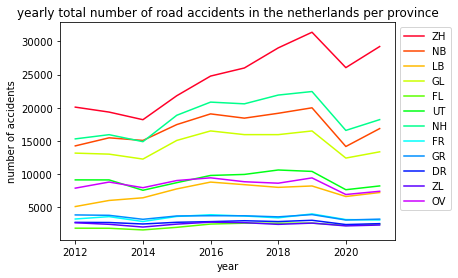

In [158]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]
        line.append(point["N_ACCIDENTS"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total number of road accidents in the netherlands per province")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

plot the total population per province per year

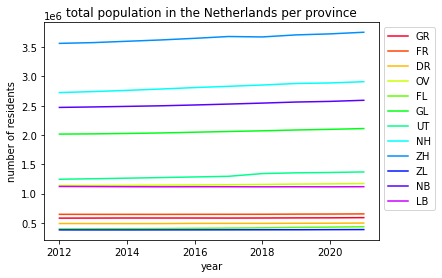

In [159]:
df_population_3.sort_values(by=["YEAR"])
year = df_population_3["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_population_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
        line.append(point["TOTAL_POPULATION"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("total population in the Netherlands per province")
plt.xlabel("year")
plt.ylabel("number of residents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

plot the population density per province per year

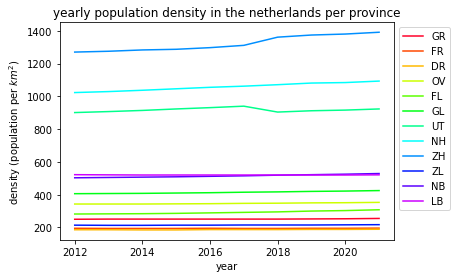

In [160]:
df_population_3.sort_values(by=["YEAR"])
year = df_population_3["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_population_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
        line.append(point["POPULATION_DENSITY"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly population density in the netherlands per province")
plt.xlabel("year")
plt.ylabel("density (population per $km^{2}$)")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

plot the amount of accidents per resident per province per year

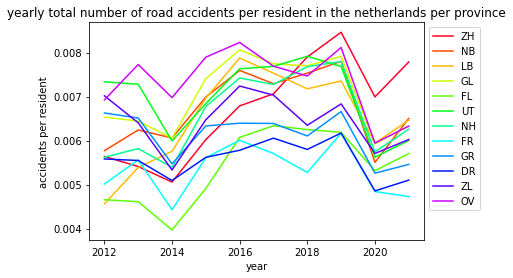

In [161]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        accidents = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]["N_ACCIDENTS"]
        population = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]["TOTAL_POPULATION"]
        accidents_per_population = accidents.values / population.values
        line.append(accidents_per_population)
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total number of road accidents per resident in the netherlands per province")
plt.xlabel("year")
plt.ylabel("accidents per resident")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# find correlation with correlation matrix

make a small correlation matrix of the dataframe which contains the amount of accidents per province per year

In [162]:
corr_population = df_7.corr()
mask = np.zeros_like(corr_population, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_population[mask] = np.nan
(corr_population
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_34164\3490262897.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_population


,YEAR,N_ACCIDENTS,PVE_CODE
YEAR,nan,nan,nan
N_ACCIDENTS,0.08,nan,nan
PVE_CODE,0.00,-0.62,nan


sort the dataframe of the amount of accidents first by year and then by province to combine it with the population dataframe

In [163]:
df_7 = df_7.sort_values(["YEAR", "PROVINCE"], ignore_index=True)
df_7

,YEAR,PROVINCE,N_ACCIDENTS,PVE_CODE
0,2012,DR,2735,10
1,2012,FL,1855,5
2,2012,FR,3241,8
3,2012,GL,13170,4
4,2012,GR,3855,9
...,...,...,...,...
115,2021,NH,18217,7
116,2021,OV,7418,12
117,2021,UT,8224,6
118,2021,ZH,29235,1


sort the dataframe of the population first by year and then by province to combine it with the accidents dataframe

In [164]:
df_population_2 = df_population_2.sort_values(["Perioden (jaar)", "PROVINCE"], ignore_index=True)
df_population_2

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,"Bevolking|Bevolkingsontwikkeling|Verhuizingen|Verhuismobiliteit, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Immigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Emigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo (aantal),"Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Inwoners op 31 december (aantal),Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei (aantal),"Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal),PROVINCE
0,Drenthe (PV),2012,489918,242757,247161,24373,28028,31871,28694,22594,...,81.5,1993.0,1727.0,266.0,0.5,489918.0,-889.0,-1.8,490362.5,DR
1,Flevoland (PV),2012,398441,199314,199127,26280,27642,28941,26916,25247,...,86.2,3696.0,2596.0,1100.0,2.8,398441.0,2916.0,7.4,396983.0,FL
2,Fryslân (PV),2012,646862,323442,323420,34557,38100,41526,39759,37078,...,84.8,3146.0,2706.0,440.0,0.7,646862.0,-352.0,-0.5,647038.0,FR
3,Gelderland (PV),2012,2015791,995180,1020611,105831,116689,129072,125131,122838,...,86.5,11761.0,10639.0,1122.0,0.6,2015791.0,5046.0,2.5,2013268.0,GL
4,Groningen (PV),2012,581705,289275,292430,28423,29156,31929,36337,51319,...,110.2,6247.0,5458.0,789.0,1.4,581705.0,830.0,1.4,581290.0,GR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Noord-Holland (PV),2021,2909827,1438477,1471350,144946,146306,153657,162480,183195,...,114.3,NaN,NaN,NaN,NaN,2909827.0,21341.0,7.4,2899156.5,NH
116,Overijssel (PV),2021,1171910,589158,582752,57238,61821,67972,75091,77292,...,92.7,NaN,NaN,NaN,NaN,1171910.0,5377.0,4.6,1169221.5,OV
117,Utrecht (PV),2021,1369873,674377,695496,75624,75934,79395,82129,89884,...,105.8,NaN,NaN,NaN,NaN,1369873.0,8720.0,6.4,1365513.0,UT
118,Zuid-Holland (PV),2021,3753944,1857303,1896641,196231,201322,207646,216602,249456,...,102.1,NaN,NaN,NaN,NaN,3753944.0,27894.0,7.5,3739997.0,ZH


now the years and provinces of the two datasets line up, combine them both into one dataset

In [165]:
df_pop_n_acc_2 = df_population_2
df_pop_n_acc_2["N_ACCIDENTS"] = df_7["N_ACCIDENTS"]
df_population_2["PVE_CODE"] = df_population_2["PROVINCE"].map({"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12}).astype(int)
df_pop_n_acc_2

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Emigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo (aantal),"Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Inwoners op 31 december (aantal),Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei (aantal),"Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal),PROVINCE,N_ACCIDENTS,PVE_CODE
0,Drenthe (PV),2012,489918,242757,247161,24373,28028,31871,28694,22594,...,1727.0,266.0,0.5,489918.0,-889.0,-1.8,490362.5,DR,2735,10
1,Flevoland (PV),2012,398441,199314,199127,26280,27642,28941,26916,25247,...,2596.0,1100.0,2.8,398441.0,2916.0,7.4,396983.0,FL,1855,5
2,Fryslân (PV),2012,646862,323442,323420,34557,38100,41526,39759,37078,...,2706.0,440.0,0.7,646862.0,-352.0,-0.5,647038.0,FR,3241,8
3,Gelderland (PV),2012,2015791,995180,1020611,105831,116689,129072,125131,122838,...,10639.0,1122.0,0.6,2015791.0,5046.0,2.5,2013268.0,GL,13170,4
4,Groningen (PV),2012,581705,289275,292430,28423,29156,31929,36337,51319,...,5458.0,789.0,1.4,581705.0,830.0,1.4,581290.0,GR,3855,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Noord-Holland (PV),2021,2909827,1438477,1471350,144946,146306,153657,162480,183195,...,NaN,NaN,NaN,2909827.0,21341.0,7.4,2899156.5,NH,18217,7
116,Overijssel (PV),2021,1171910,589158,582752,57238,61821,67972,75091,77292,...,NaN,NaN,NaN,1171910.0,5377.0,4.6,1169221.5,OV,7418,12
117,Utrecht (PV),2021,1369873,674377,695496,75624,75934,79395,82129,89884,...,NaN,NaN,NaN,1369873.0,8720.0,6.4,1365513.0,UT,8224,6
118,Zuid-Holland (PV),2021,3753944,1857303,1896641,196231,201322,207646,216602,249456,...,NaN,NaN,NaN,3753944.0,27894.0,7.5,3739997.0,ZH,29235,1


make a correlation matrix of the resulting dataframe

In [166]:
corr_pop_n_acc = df_pop_n_acc_2.corr()
mask = np.zeros_like(corr_pop_n_acc, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_pop_n_acc[mask] = np.nan
(corr_pop_n_acc
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .set_precision(2))

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_34164\2900756093.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_pop_n_acc


,Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal),"Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|Jonger dan 5 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|5 tot 10 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|10 tot 15 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|15 tot 20 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|20 tot 25 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|25 tot 45 jaar (%)"


# apply regression with the chosen features

apply multiple linear regression for one province with a few features and plot the results

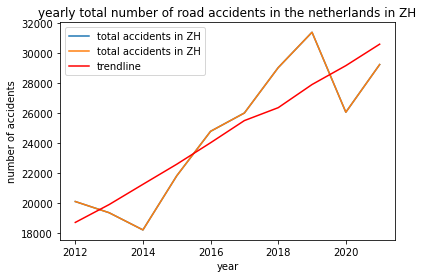

In [167]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = df_target[["Perioden (jaar)", "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)"]].values

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)

predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, df_target["N_ACCIDENTS"].values, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")

plt.legend()
plt.show()

try multiple linear regression with all features and plot the results <br>
also drop the columns that still have missing values

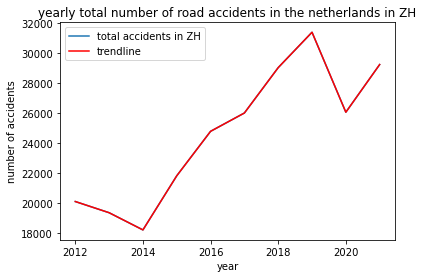

In [168]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = df_target.drop(columns=["N_ACCIDENTS"])
x = x.dropna(axis=1)

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

apply multiple regression with all features that have a 0.9 correlation with the amount of accidents in the correlation matrix

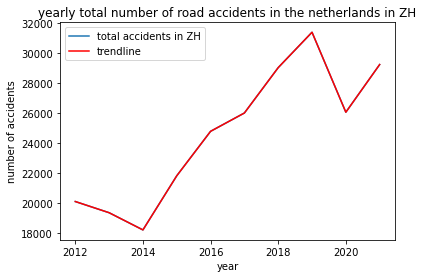

In [169]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values

df_corr_higher_than = pd.DataFrame(corr_pop_n_acc.loc["N_ACCIDENTS"])
df_corr_higher_than.reset_index(inplace=True)
df_corr_higher_than = df_corr_higher_than.loc[df_corr_higher_than["N_ACCIDENTS"] >= 0.90].reset_index(drop=True)
x = df_target[df_corr_higher_than["index"]]

x = x.dropna(axis=1)

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

apply multiple linear regression with less features

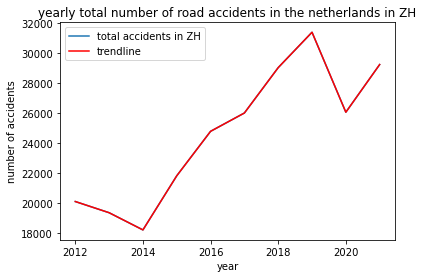

In [170]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)"
]]

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = target_features

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

# multiple linear regression feature selection part 2

make a correlation matrix with the reduced features

In [171]:
target_province = "ZH"
df_target = df_pop_n_acc_2
df_target = df_target[[
    "Perioden (jaar)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)",
    "PVE_CODE",
    "N_ACCIDENTS",
]]

corr_target = df_target.corr()
mask = np.zeros_like(corr_target, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_target[mask] = np.nan
(corr_target
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .set_precision(2))

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_34164\3296750875.py:33: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_target


,Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²),PVE_CODE,N_ACCIDENTS
Perioden (jaar),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),0.02,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),0.02,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),0.02,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),0.03,1.00,0.99,1.00,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal),0.01,1.00,0.99,1.00,0.99,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal),0.01,1.00,1.00,1.00,1.00,0.99,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal),0.10,0.99,0.99,0.99,0.99,0.98,0.97,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal),0.09,0.99,0.99,0.99,0.99,0.98,0.97,0.99,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# trying new types of regression

the explanation is below the multiple linear regression, SGD regression and the ridge regession examples <br>
there you can also test different features on different regession models

apply multiple linear regression <br>

score test data:  0.2900266192447285
score all data:  0.8438465652722926


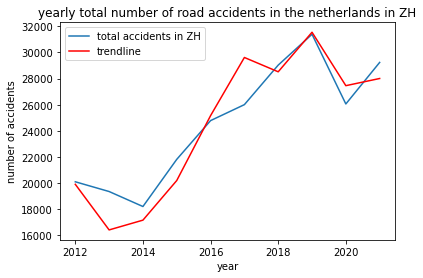

In [172]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", #3
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)", #2
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" #2 #3
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

the same as linear regression but with SGD regression instead

score test data:  -2.7616423207206306e+36
score all data:  -4.262722270318206e+35


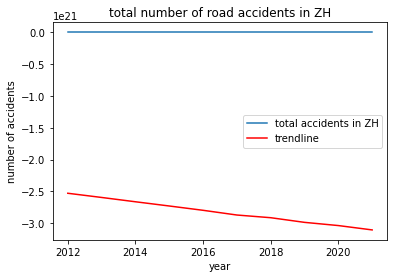

In [173]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", #3
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)", #1
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)", #2
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" #2 #3
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = SGDRegressor()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)


plt.title("total number of road accidents in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

the same as linear regression but with ridge regression instead

score test data:  0.04911306486862299
score all data:  0.8178582496341695


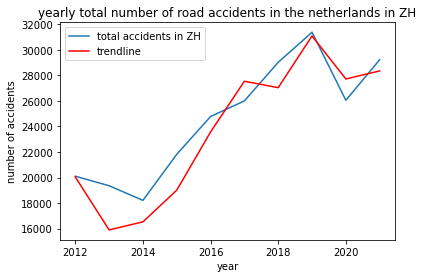

In [174]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", #3
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)", #2
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" #2 #3
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = Ridge()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

choos the province that you want to use <br>
to choos the province, use the province code <br>
Zuid-Holland: ZH <br>
Noord-Brabant: NB <br>
Limburg: LB <br>
Gelderland: GL <br>
Flevoland: FL <br>
Utrech: UT <br>
Noord-Holland: NH <br>
Fryslân: FR <br>
Groningen: GR <br>
Drenthe: DR <br>
Zeeland: ZL <br>
Overijssel: OV <br>

In [175]:
target_province = "ZH"

In [176]:
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

you can change the features used by commenting/uncommenting certain features <br>
some possible feature sets have a # and a number of the corresponding set behind them

In [177]:
target_features = df_target[[
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", #3
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)", #2
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" #2 #3
]]

split the data into test and train data

In [178]:
y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)


you can choose which type of regression you want to use the same was as choosing the features

In [179]:
regression = LinearRegression()
# regression = SGDRegressor()
# regression = Ridge()

fit the model and score it once with just the test data and once with all the data of the chose province

In [180]:
regression.fit(x_train, y_train)

predicted_n_accidents = regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

score test data:  0.7864451913077936
score all data:  0.8778011798533172


plot the results in a graph

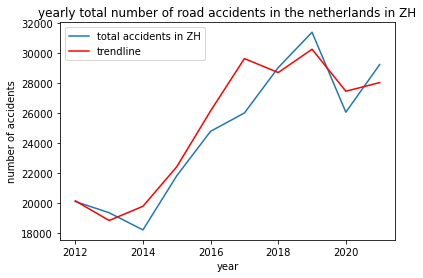

In [181]:
plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()